# Evaluating Tikhonet Trained

In this Notebook we are going to evaluate the performance of a [Tikhonet](https://arxiv.org/pdf/1911.00443.pdf) trained.

## Required Libraries and Functions

In [1]:
%matplotlib inline
import sys

# path
data_path = './'

# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import pickle

## Load The Comparison Batch

In [2]:
f = open(data_path+"cfht_examples.pkl", "rb")
batch = pickle.load(f)
f.close()

## Plot Successful Galaxy Images

/Users/utsavakhaury/opt/miniconda3/envs/g2g/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
/Users/utsavakhaury/opt/miniconda3/envs/g2g/lib/python3.7/site-packages/mpl_toolkits/axes_grid1/axes_grid.py:46: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar


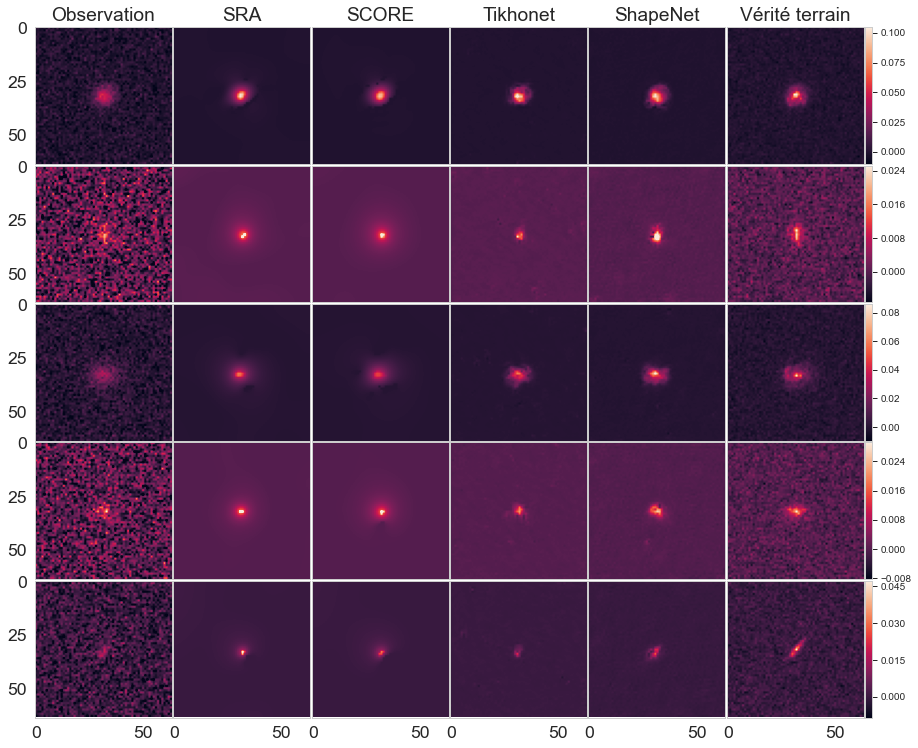

In [3]:
# set seaborn theme and style
sns.set_theme()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 2.5})
#remove grid from images
sns.set_style("whitegrid", {'axes.grid' : False})

list_im = []
keys = ['inputs', 'sparsity', 'score', 'tikhonet', 'tikhonet_sc', 'targets']
for i in range(5):
    for key in keys:
        list_im += [batch['unflagged'][key][i]]

list_min = []
list_max = []

for im in batch['unflagged']['targets']:
    list_min += [np.min(im)]
    list_max += [np.max(im)]
    
list_min = np.repeat(np.array(list_min),6).T
list_max = np.repeat(np.array(list_max),6).T

fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 6),  # creates 2x2 grid of axes
#                  axes_pad=0.1,  # pad between axes in inch.
#                  cbar_location="right",
                 cbar_mode="edge",
                 )
i=0
for ax, cax, im in zip(grid, grid.cbar_axes, list_im):
    # Iterating over the grid returns the Axes.
    imx = ax.imshow(im,vmin=list_min[i],vmax=list_max[i])
    cax.tick_params(labelsize=10)
    if i % 6:
        grid.cbar_axes[i//6].colorbar(imx)
    i+=1
    
labels = ['Observation', 'SRA', 'SCORE', 'Tikhonet', 'ShapeNet', 'Vérité terrain']
for ax, label in zip(grid,labels):
    ax.set_title(label)

plt.savefig('cfht2hst_images_unflagged.pdf', bbox_inches='tight')

## Plot Failed Galaxy Images

/Users/utsavakhaury/opt/miniconda3/envs/g2g/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


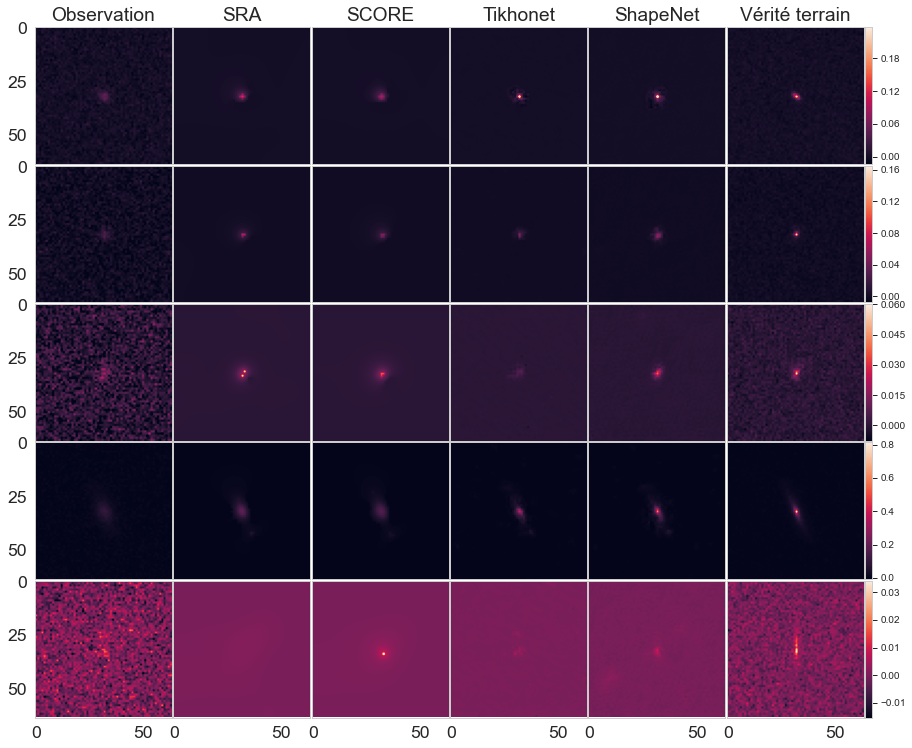

In [4]:
list_im = []
for i in range(5):
    for key in keys:
        list_im += [batch['flagged'][key][i]]

list_min = []
list_max = []

for im in batch['flagged']['targets']:
    list_min += [np.min(im)]
    list_max += [np.max(im)]
    
list_min = np.repeat(np.array(list_min),6).T
list_max = np.repeat(np.array(list_max),6).T

fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 6),  # creates 2x2 grid of axes
#                  axes_pad=0.1,  # pad between axes in inch.
#                  cbar_location="right",
                 cbar_mode="edge",
                 )
i=0
for ax, cax, im in zip(grid, grid.cbar_axes, list_im):
    # Iterating over the grid returns the Axes.
    imx = ax.imshow(im,vmin=list_min[i],vmax=list_max[i])
    cax.tick_params(labelsize=10)
    if i % 6:
        grid.cbar_axes[i//6].colorbar(imx)
    i+=1

for ax, label in zip(grid,labels):
    ax.set_title(label)

plt.savefig('cfht2hst_images_flagged.pdf', bbox_inches='tight')